In [181]:
import pandas as pd
import numpy as np

In [182]:
from scipy.stats import truncnorm
from matplotlib.colors import LogNorm
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import uproot as ur

## Simulation

In [183]:
vertex = (0, 0, 0)
theta = (np.pi/3)
phi = (np.pi/6)

Ed_prim = np.arange(10, 0, -1)
steplen = 0.1
x_prim = [vertex[0]+i*steplen*np.sin(theta)*np.cos(phi) for i in range(len(Ed_prim))]
y_prim = [vertex[0]+i*steplen*np.sin(theta)*np.sin(phi) for i in range(len(Ed_prim))]
z_prim = [vertex[0]+i*steplen*np.cos(theta) for i in range(len(Ed_prim))]

In [184]:
PrimaryEvt = pd.DataFrame({'x': x_prim, 'y': y_prim, 'z': z_prim, 'Edep': Ed_prim})
PrimaryEvt

,x,y,z,Edep
0,0.000,0.000000,0.00,10
1,0.075,0.043301,0.05,9
2,0.150,0.086603,0.10,8
3,0.225,0.129904,0.15,7
4,0.300,0.173205,0.20,6
5,0.375,0.216506,0.25,5
6,0.450,0.259808,0.30,4
7,0.525,0.303109,0.35,3
8,0.600,0.346410,0.40,2
9,0.675,0.389711,0.45,1


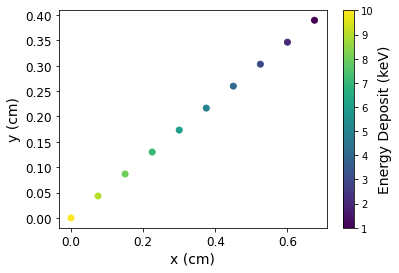

In [185]:
plt.scatter(PrimaryEvt['x'], PrimaryEvt['y'], c=PrimaryEvt['Edep'])
plt.xlabel('x (cm)', fontsize=14)
plt.ylabel('y (cm)', fontsize=14)

ax = plt.gca()
cb = plt.colorbar(label = "Energy Deposit (keV)")
cb.set_label('Energy Deposit (keV)', fontsize = 14)
ax.tick_params(labelsize=12)

# Attempt to Refactor the TestEmulatorLibrary.ipynb Notebook

In [186]:
import uproot as ur
from simpleparamaterisation import TPCevt as TPC



datafile = ur.open("simOut_28796KShell 1.root")
datafile = datafile['data;14'].arrays(library="pd")
datafile

edep          x           y           z  PID         t  \
entry  subentry                                                               
1      0         0.000044  89.622077  118.517928  118.149489   22  0.099617   
       1         0.000084  89.624062  118.520284  118.149550   11  0.099967   
       2         0.000137  89.623663  118.521583  118.149713   11  0.100165   
       3         0.000049  89.621632  118.518333  118.149101   11  0.099709   
       4         0.000022  89.613923  118.500239  118.150955   11  0.100270   
...                   ...        ...         ...         ...  ...       ...   
977563 2         0.000217  34.915656  -84.285917   95.219539   11  0.035667   
       3         0.000203  34.937850  -84.273095   95.251398   11  0.037075   
       4         0.000742  34.936562  -84.280914   95.286863   11  0.038383   
       5         0.001237  34.941689  -84.280541   95.307985   11  0.039341   
       6         0.000232  34.943884  -84.280959   95.308533   11  0.039596   

                        x0          y0         z0       px0       py0  \
entry  subentry                                                         
1      0         90.055411  116.305059  88.370227 -0.014510  0.074097   
       1         90.055411  116.305059  88.370227 -0.014510  0.074097   
       2         90.055411  116.305059  88.370227 -0.014510  0.074097   
       3         90.055411  116.305059  88.370227 -0.014510  0.074097   
       4         90.055411  116.305059  88.370227 -0.014510  0.074097   
...                    ...         ...        ...       ...       ...   
977563 2         35.743734  -77.630020  87.151340 -0.080041 -0.635482   
       3         35.743734  -77.630020  87.151340 -0.080041 -0.635482   
       4         35.743734  -77.630020  87.151340 -0.080041 -0.635482   
       5         35.743734  -77.630020  87.151340 -0.080041 -0.635482   
       6         35.743734  -77.630020  87.151340 -0.080041 -0.635482   

                      pz0       E0   t0  PID0  
entry  subentry                                
1      0         0.997145  0.00288  0.0    22  
       1         0.997145  0.00288  0.0    22  
       2         0.997145  0.00288  0.0    22  
       3         0.997145  0.00288  0.0    22  
       4         0.997145  0.00288  0.0    22  
...                   ...      ...  ...   ...  
977563 2         0.767955  0.00288  0.0    22  
       3         0.767955  0.00288  0.0    22  
       4         0.767955  0.00288  0.0    22  
       5         0.767955  0.00288  0.0    22  
       6         0.767955  0.00288  0.0    22  

[9638111 rows x 15 columns]

In [187]:
f = datafile
maxZ = 0
minZ = 0

for entry in f['z0']:
    if entry > maxZ:
        maxZ = entry
    if entry < minZ:
        minZ = entry


print(minZ, maxZ)

-149.9986673170211 149.99958416664236


## First Pass: Single Event

In [188]:
saveevt = 1
PrimaryEvt = pd.DataFrame({'x': f['x']/10+15, 'y': f['y']/10+15, 'z': f['z']/10+15, 'Edep': f['edep']*1000})
#PrimaryEvt.reset_index(drop=True)

InitVertex = (f['x0']/10+15, f['y0']/10+15, f['z0']/10+15)

InitMomDir = (f['px0'], f['py0'], f['pz0'])
InitEn = f['E0']*1000


In [189]:
PrimaryEvt = f.loc[f.index.get_level_values('entry') == 1]
PrimaryEvt = pd.DataFrame({'x': PrimaryEvt['x']/10+15, 'y': PrimaryEvt['y']/10+15, 'z': PrimaryEvt['z']/10+15, 'Edep': PrimaryEvt['edep']*1000})
PrimaryEvt = PrimaryEvt.reset_index(drop=True)
PrimaryEvt

,x,y,z,Edep
0,23.962208,26.851793,26.814949,0.043670
1,23.962406,26.852028,26.814955,0.083792
2,23.962366,26.852158,26.814971,0.136588
3,23.962163,26.851833,26.814910,0.049380
4,23.961392,26.850024,26.815096,0.021973
5,23.957640,26.848118,26.816367,0.665817
6,23.956821,26.845949,26.814549,0.376015
7,23.957319,26.844613,26.812828,0.433897
8,23.957131,26.846090,26.812778,0.016025
9,23.957751,26.844945,26.813446,1.052442


In [190]:
InitVertexdf = pd.DataFrame(InitVertex).T
InitVertexFirst = InitVertexdf.loc[InitVertexdf.index.get_level_values('entry') == saveevt]
InitVertexFirst = InitVertexFirst.reset_index(drop=True)
InitVertex = tuple(InitVertexFirst.iloc[saveevt-1])
InitVertex
#InitVertex = InitVertexdf.loc[InitVertexdf.index.get_level_values('entry') == saveevt]

(24.005541066864634, 26.63050592598521, 23.83702270135447)

In [191]:
print(((InitVertex[0]-PrimaryEvt['x'][0])**2 + (InitVertex[1]-PrimaryEvt['y'][0])**2 + 
      (InitVertex[2] - PrimaryEvt['z'][0])**2)**0.5)

2.9864510505681103


In [192]:
PrimaryEvt['Edep'].sum()

2.8796

In [193]:
InitEndf = pd.DataFrame(InitEn).T
InitEn = InitEndf.loc[InitEndf.index.get_level_values('entry') == saveevt]
InitEn = InitEn.reset_index(drop = True)
InitEn = np.mean(InitEn)
InitEn

KeyError: 'Requested level (entry) does not match index name (None)'

In [194]:
InitMomdf = pd.DataFrame(InitMomDir).T
InitMomDirFirst = InitMomdf.loc[InitMomdf.index.get_level_values('entry') == saveevt]
InitMomDirFirst = InitMomDirFirst.reset_index(drop=True)
InitMomDir = tuple(InitMomDirFirst.iloc[saveevt-1])
InitMomDir

(-0.014509977900073877, 0.07409695062296387, 0.997145477074292)

In [195]:
det = TPC.Detector("Simple TPC with Atmospheric Ar (default values)")

In [196]:
TPC.generate_carriers(PrimaryEvt, det)

In [197]:
PrimaryEvt

,x,y,z,Edep,NIP
0,23.962208,26.851793,26.814949,0.043670,2
1,23.962406,26.852028,26.814955,0.083792,5
2,23.962366,26.852158,26.814971,0.136588,5
3,23.962163,26.851833,26.814910,0.049380,3
4,23.961392,26.850024,26.815096,0.021973,1
5,23.957640,26.848118,26.816367,0.665817,23
6,23.956821,26.845949,26.814549,0.376015,13
7,23.957319,26.844613,26.812828,0.433897,18
8,23.957131,26.846090,26.812778,0.016025,0
9,23.957751,26.844945,26.813446,1.052442,44


In [198]:
DriftedEvt = TPC.drift_carriers(PrimaryEvt, det)
DriftedEvt

,idx_PrimaryEvt,x,y,dt
0,0,23.883007,27.027758,0.157598
1,0,23.901574,26.760457,0.157512
2,1,24.011389,26.815801,0.157597
3,1,23.724565,26.853099,0.158718
4,1,23.885836,26.742267,0.15827
...,...,...,...,...
109,9,23.942413,26.976717,0.156847
110,9,23.958206,26.961889,0.15824
111,9,24.102048,26.728439,0.158039
112,9,23.736388,26.742569,0.158962


In [199]:
print(PrimaryEvt['NIP'].sum())

114


In [200]:
ReadoutEvt = TPC.gain_and_readout(DriftedEvt, det, nsigma_extend=5)
ReadoutEvt

,x,y,dt,Nel
0,23.6,26.4,0.157,10.176578
1,23.6,26.4,0.158,554.943499
2,23.6,26.4,0.159,144.852326
3,23.6,26.5,0.157,157.336669
4,23.6,26.5,0.158,6904.600054
...,...,...,...,...
235,24.2,27.1,0.159,2565.694494
236,24.2,27.2,0.156,178.594575
237,24.2,27.2,0.157,8633.494600
238,24.2,27.2,0.158,5213.601760


In [201]:
%matplotlib inline

Text(0, 0.5, '$y$ (cm)')

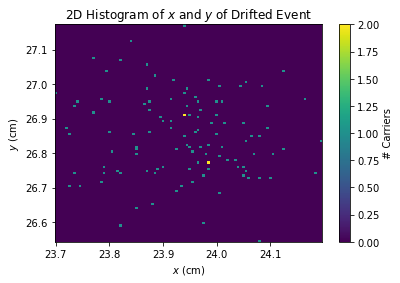

In [202]:
max_x = max(DriftedEvt['x'])
min_x = min(DriftedEvt['x'])

max_y = max(DriftedEvt['y'])
min_y = min(DriftedEvt['y'])


plt.figure()
plt.hist2d(DriftedEvt['x'], DriftedEvt['y'], range=((min_x, max_x), (min_y, max_y)), bins=(100,100))

plt.title("2D Histogram of $x$ and $y$ of Drifted Event")
cb = plt.colorbar()
cb.set_label("# Carriers")
plt.xlabel("$x$ (cm)")
plt.ylabel("$y$ (cm)")

Text(0, 0.5, '$dt$ (cm)')

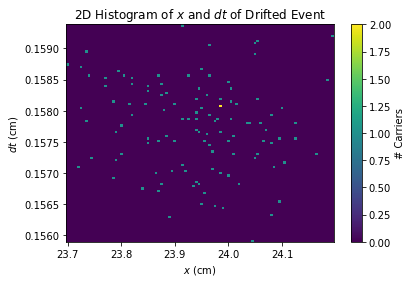

In [203]:
max_x = max(DriftedEvt['x'])
min_x = min(DriftedEvt['x'])

max_dt = max(DriftedEvt['dt'])
min_dt = min(DriftedEvt['dt'])


plt.figure()
plt.hist2d(DriftedEvt['x'], DriftedEvt['dt'], range=((min_x, max_x), (min_dt, max_dt)), bins=(100,100))

plt.title("2D Histogram of $x$ and $dt$ of Drifted Event")
cb = plt.colorbar()
cb.set_label("# Carriers")
plt.xlabel("$x$ (cm)")
plt.ylabel("$dt$ (cm)")

Text(0, 0.5, '$dt$ (cm)')

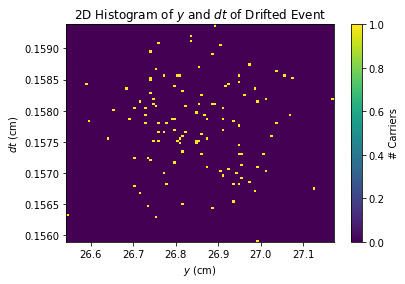

In [204]:
plt.figure()
plt.hist2d(DriftedEvt['y'], DriftedEvt['dt'], range=((min_y, max_y), (min_dt, max_dt)), bins=(100,100))

plt.title("2D Histogram of $y$ and $dt$ of Drifted Event")
cb = plt.colorbar()
cb.set_label("# Carriers")
plt.xlabel("$y$ (cm)")
plt.ylabel("$dt$ (cm)")

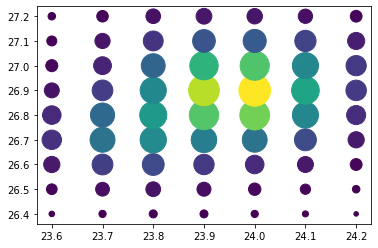

In [205]:
projectxy = pd.DataFrame(ReadoutEvt.groupby(['x','y'])['Nel'].sum()).reset_index()
plt.scatter(projectxy.x,projectxy.y, c=projectxy.Nel, s=((projectxy.Nel/np.max(projectxy.Nel))**0.5)*1000)

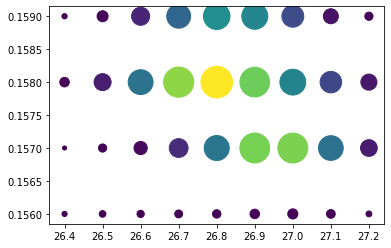

In [206]:
projectydt = pd.DataFrame(ReadoutEvt.groupby(['y','dt'])['Nel'].sum()).reset_index()
plt.scatter(projectydt.y,projectydt.dt, c=projectydt.Nel, s=((projectydt.Nel/np.max(projectydt.Nel))**0.5)*1000)

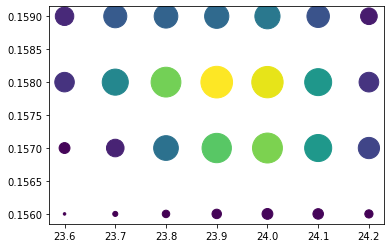

In [207]:
projectxdt = pd.DataFrame(ReadoutEvt.groupby(['x','dt'])['Nel'].sum()).reset_index()
plt.scatter(projectxdt.x,projectxdt.dt, c=projectxdt.Nel, s=((projectxdt.Nel/np.max(projectxdt.Nel))**0.5)*1000)

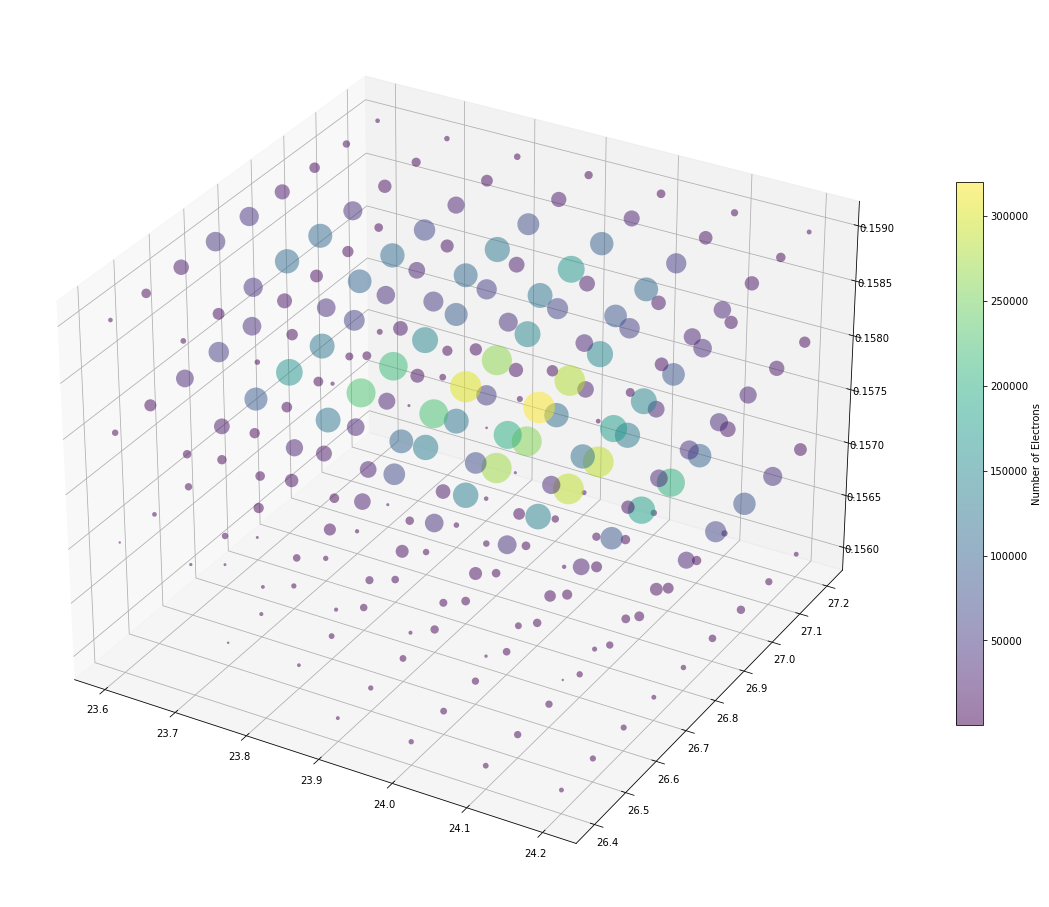

In [208]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')
sc = ax.scatter(ReadoutEvt['x'], ReadoutEvt['y'], ReadoutEvt['dt'], 
                c = ReadoutEvt['Nel'], s=((ReadoutEvt.Nel/np.max(ReadoutEvt.Nel))**0.5)*1000, alpha=0.5, lw=0)
cb = plt.colorbar(sc, shrink=0.5, drawedges =False, spacing='proportional', label = 'Number of Electrons')
cb.solids.set_linewidth(3)
plt.show()

In [209]:
det = TPC.Detector('Simple TPC with Atmospheric Ar (default values)')

In [210]:
FirstEvt = f.loc[f.index.get_level_values('entry') == 1].iloc[0]


np.mean(FirstEvt['x0'])

90.05541066864635

In [211]:
pd.DataFrame({'x': FirstEvt['x0'], 'y': FirstEvt['y0'], 'z': FirstEvt['z0'], 'Edep':[-1], 'NIP':[1]})


,x,y,z,Edep,NIP
0,90.055411,116.305059,88.370227,-1,1


In [212]:
pd.concat([pd.DataFrame({'x':FirstEvt['x0'], 'y':FirstEvt['y0'], 'z':FirstEvt['z0'], 'Edep':[-1], 'NIP':[1]}),PrimaryEvt], axis=0)

,x,y,z,Edep,NIP
0,90.055411,116.305059,88.370227,-1.000000,1
0,23.962208,26.851793,26.814949,0.043670,2
1,23.962406,26.852028,26.814955,0.083792,5
2,23.962366,26.852158,26.814971,0.136588,5
3,23.962163,26.851833,26.814910,0.049380,3
4,23.961392,26.850024,26.815096,0.021973,1
5,23.957640,26.848118,26.816367,0.665817,23
6,23.956821,26.845949,26.814549,0.376015,13
7,23.957319,26.844613,26.812828,0.433897,18
8,23.957131,26.846090,26.812778,0.016025,0


In [213]:
PrimaryEvt['NIP'].sum()

114

In [214]:
PrimaryEvt

,x,y,z,Edep,NIP
0,23.962208,26.851793,26.814949,0.043670,2
1,23.962406,26.852028,26.814955,0.083792,5
2,23.962366,26.852158,26.814971,0.136588,5
3,23.962163,26.851833,26.814910,0.049380,3
4,23.961392,26.850024,26.815096,0.021973,1
5,23.957640,26.848118,26.816367,0.665817,23
6,23.956821,26.845949,26.814549,0.376015,13
7,23.957319,26.844613,26.812828,0.433897,18
8,23.957131,26.846090,26.812778,0.016025,0
9,23.957751,26.844945,26.813446,1.052442,44


In [215]:
DriftedEvt.head()

,idx_PrimaryEvt,x,y,dt
0,0,23.883007,27.027758,0.157598
1,0,23.901574,26.760457,0.157512
2,1,24.011389,26.815801,0.157597
3,1,23.724565,26.853099,0.158718
4,1,23.885836,26.742267,0.15827


In [216]:
pd.DataFrame(columns=['idx_PrimaryEvt', 'x', 'y', 'dt'], index=np.arange(-1,121,1))

,idx_PrimaryEvt,x,y,dt
-1,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
...,...,...,...,...
116,NaN,NaN,NaN,NaN
117,NaN,NaN,NaN,NaN
118,NaN,NaN,NaN,NaN
119,NaN,NaN,NaN,NaN


In [217]:
Ndrifted = int(PrimaryEvt['NIP'].sum())
print(Ndrifted)

114


In [218]:
np.arange(PrimaryEvt.index[0],Ndrifted+PrimaryEvt.index[0],1)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113])

In [219]:
DriftedEvt = pd.DataFrame(columns=['idx_PrimaryEvt', 'x', 'y', 'dt'], 
                          index=np.arange(PrimaryEvt.index[0],Ndrifted+PrimaryEvt.index[0],1))
print(DriftedEvt)

    idx_PrimaryEvt    x    y   dt
0              NaN  NaN  NaN  NaN
1              NaN  NaN  NaN  NaN
2              NaN  NaN  NaN  NaN
3              NaN  NaN  NaN  NaN
4              NaN  NaN  NaN  NaN
..             ...  ...  ...  ...
109            NaN  NaN  NaN  NaN
110            NaN  NaN  NaN  NaN
111            NaN  NaN  NaN  NaN
112            NaN  NaN  NaN  NaN
113            NaN  NaN  NaN  NaN

[114 rows x 4 columns]


In [220]:
DriftedEvt['idx_PrimaryEvt'].loc[-1:0]

0    NaN
Name: idx_PrimaryEvt, dtype: object

In [221]:
%%time
Nevts = 100
#Read in and process N events
PrimaryEvents = [] #TODO: convert to either multiindexed DataFrame or Xarray
DriftedEvents = []
ReadoutEvents = []
# InitVertices = np.empty(shape=(Nevts,3), dtype=np.float)
InitMomDirs = np.empty(shape=(Nevts,3), dtype=np.float)
InitEns = np.empty(Nevts, dtype=np.float)
    PrimaryEvt = pd.DataFrame({'x': f['x']/10, 'y': f['y']/10, 
                               'z': f['z']/10 + 15, 
                               'Edep': f['edep']*1000})
    TPC.generate_carriers(PrimaryEvt, det)
    #Insert the vertex with 1 ion pair on PrimaryEvt, at index = -1
    PrimaryEvt.loc[-1] = [f['x0'], f['y0'], f['z0'], -1, int(1)]
    #sort 
    if i == Nevts-1:
        break

IndentationError: unexpected indent (<unknown>, line 9)

In [ ]:
SignalCharge2 = [np.sum(ReadoutEvt['x']), np.sum(ReadoutEvt['y']), np.sum(ReadoutEvt['dt']), np.sum(ReadoutEvt['Nel'])]

0.5


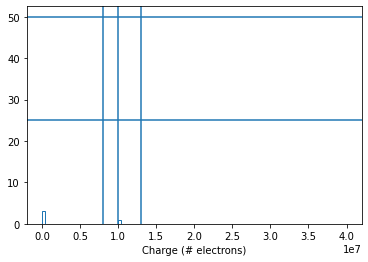

In [ ]:
plt.hist(SignalCharge2, histtype='step', bins=100, range=(0,4e7));
plt.xlabel("Charge (# electrons)")
plt.axvline(1.0e7)
plt.axhline(50)
plt.axhline(50/2)
plt.axvline(0.8e7)
plt.axvline(1.3e7)
print((1.3-0.8)/1.)

In [ ]:
ReadoutGrid

NameError: name 'ReadoutGrid' is not defined